# Chapter 3. Classification

## MNIST
#### About Data
The MNIST dataset, which is a set of 70,000
small images of digits handwritten by high school students and employees
of the US Census Bureau.

In [1]:
from sklearn.datasets import fetch_openml

# download the data
mnist = fetch_openml('mnist_784', as_frame=False) 

In [2]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape      #2D-array

(70000, 784)

There are 70,000 images, and each image has 784 features. 

In [4]:
y.shape      #1D array

(70000,)

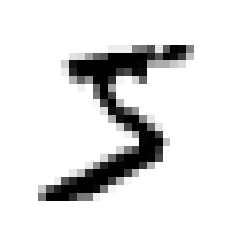

In [5]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [6]:
y[0]

'5'

In [7]:
#from string to integer
import numpy as np
y = y.astype(np.uint8)

### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], X[60000:]

### Training a Binary Classifier


In [9]:
y_train_5 = (y_train == 5)   # True for all 5s
y_test_5 = (y_test == 5)

#### Stochastic Gradient Descent (SGD) classifier

In [10]:
from sklearn.linear_model import SGDClassifier

# model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# using the model to detect number of 5s
sgd_clf.predict([some_digit])

array([ True])

### Evaluation of Model

#### Measuring the Accuracy 


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,
               scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

It can be observed the model's accuracy is above 95%

#### Dummy Classifier

In [13]:
from sklearn.dummy import DummyClassifier
# model
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict([X_train])))   # predicts False, no 5s

False


In [14]:
# model's accuracy
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrix

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

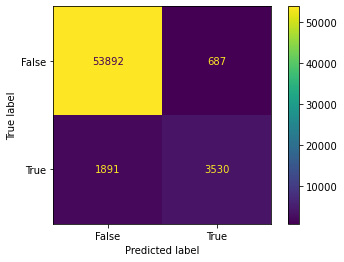

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

In [18]:
# pretend perfection
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [19]:
# report of the model
from sklearn.metrics import classification_report
print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



from the report, if when it claims an image represent 5, it is 84% correct and it detects it 65% of the time.

### Precision and Recall Tradeoffs

In [20]:
# returns a score of each instance
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores

array([2164.22030239])

In [21]:
threshold = 0   # set threshold
y_some_digit_pred = (y_scores > threshold)   # prediction 
y_some_digit_pred

array([ True])

it can be observed that threshold is 0

In [22]:
threshold = 3000   #set thresold
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Raising threshold decreases the recall

####  Deciding on what threshold to use 

In [23]:
# scores of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

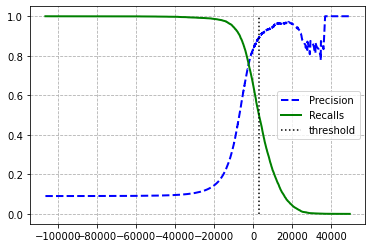

In [25]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recalls", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid(True, linestyle="--")
plt.legend()
plt.show()

#### Selecting Good Precision Tradeoff 2

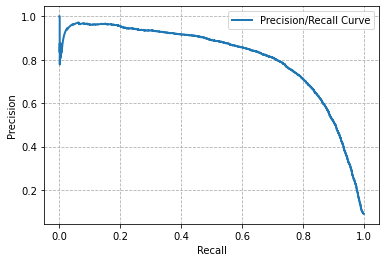

In [26]:
%matplotlib inline
plt.plot(recalls, precisions, 
         linewidth=2, label="Precision/Recall Curve")
plt.grid(True, linestyle="--")
plt.tick_params(labelsize=10)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [27]:
# 90% Precision
idx_for_90_precision = (precisions >= 0.9).argmax() #returns max first index
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [28]:
# prediction
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [29]:
# check the metrics
print(classification_report(y_train_5, y_train_pred_90))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97     54579
        True       0.90      0.48      0.63      5421

    accuracy                           0.95     60000
   macro avg       0.93      0.74      0.80     60000
weighted avg       0.95      0.95      0.94     60000



it can be observed that the precision is 90% while the recall 48%. This seems to be a good tradeoff for the model

#### The ROC Curve

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [31]:
idx_for_threshold_at_90 = (thresholds <=
                           threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

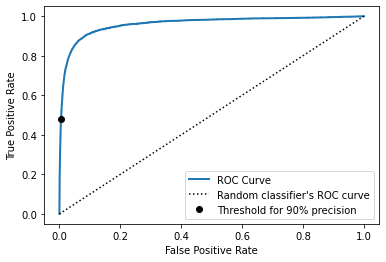

In [32]:
# plot roc curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
#dummy classifier
plt.plot([0, 1], [0, 1], "k:", 
         label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

The higher the recall (TPR), the more false
positives (FPR) the classifier produces

In [33]:
from sklearn.metrics import auc, roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

96% accuracy on the majority class which is negative. So this metric is not good for the model.

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initialize model
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, 
                                    X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_probas_forest[:2] # class pribs for first two images 

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

In [ ]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5,
                                                                              y_scores_forest)
 
plt.plot(recalls_forest, precisions_forest, "b-",linewidth=2, 
         label="Random Forest" )
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend()
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [ ]:
# positive proba
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)